In [37]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import src.utils.globals as g
from src.utils.noise import NoiseMachine, NoiseFactory

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
ids = ['6640-102140-1']
df_in = pd.read_parquet(g.path_tracks)
df_in = df_in[df_in['robotid'].isin(ids)]

seqids = df_in['seqid'].unique()
randseq = np.random.choice(seqids, 1)[0]
df_seq = df_in[df_in['seqid'] == randseq]


In [43]:
print(df_seq)


         timeindex_bin                              seqid        robotid  \
4145328              0  6640-102140-1|2021-07-15|03:24:29  6640-102140-1   
4145329              1  6640-102140-1|2021-07-15|03:24:29  6640-102140-1   
4145330              2  6640-102140-1|2021-07-15|03:24:29  6640-102140-1   
4145331              3  6640-102140-1|2021-07-15|03:24:29  6640-102140-1   
4145332              4  6640-102140-1|2021-07-15|03:24:29  6640-102140-1   
...                ...                                ...            ...   
4150287           4959  6640-102140-1|2021-07-15|03:24:29  6640-102140-1   
4150288           4960  6640-102140-1|2021-07-15|03:24:29  6640-102140-1   
4150289           4961  6640-102140-1|2021-07-15|03:24:29  6640-102140-1   
4150290           4962  6640-102140-1|2021-07-15|03:24:29  6640-102140-1   
4150291           4963  6640-102140-1|2021-07-15|03:24:29  6640-102140-1   

               date      time  timeindex  motorposition  speedsetpoint  \
4145328  2021

In [45]:
def plot_dfs(dfs, title="", colnums=3):
    # Calculate the number of rows needed
    cols = colnums
    num_plots = len(dfs)
    rows = (num_plots + cols - 1) // cols  # Ceiling division to ensure enough rows

    # Create a figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))

    # Flatten axes for easy indexing if needed
    axes = axes.flatten()

    # Loop through the DataFrames and plot each in the corresponding subplot
    for i, (name, df) in enumerate(dfs.items()):
        NoiseMachine._plot(data=df, ax=axes[i])

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(title)
    plt.tight_layout()

    # Show the plot
    plt.show()

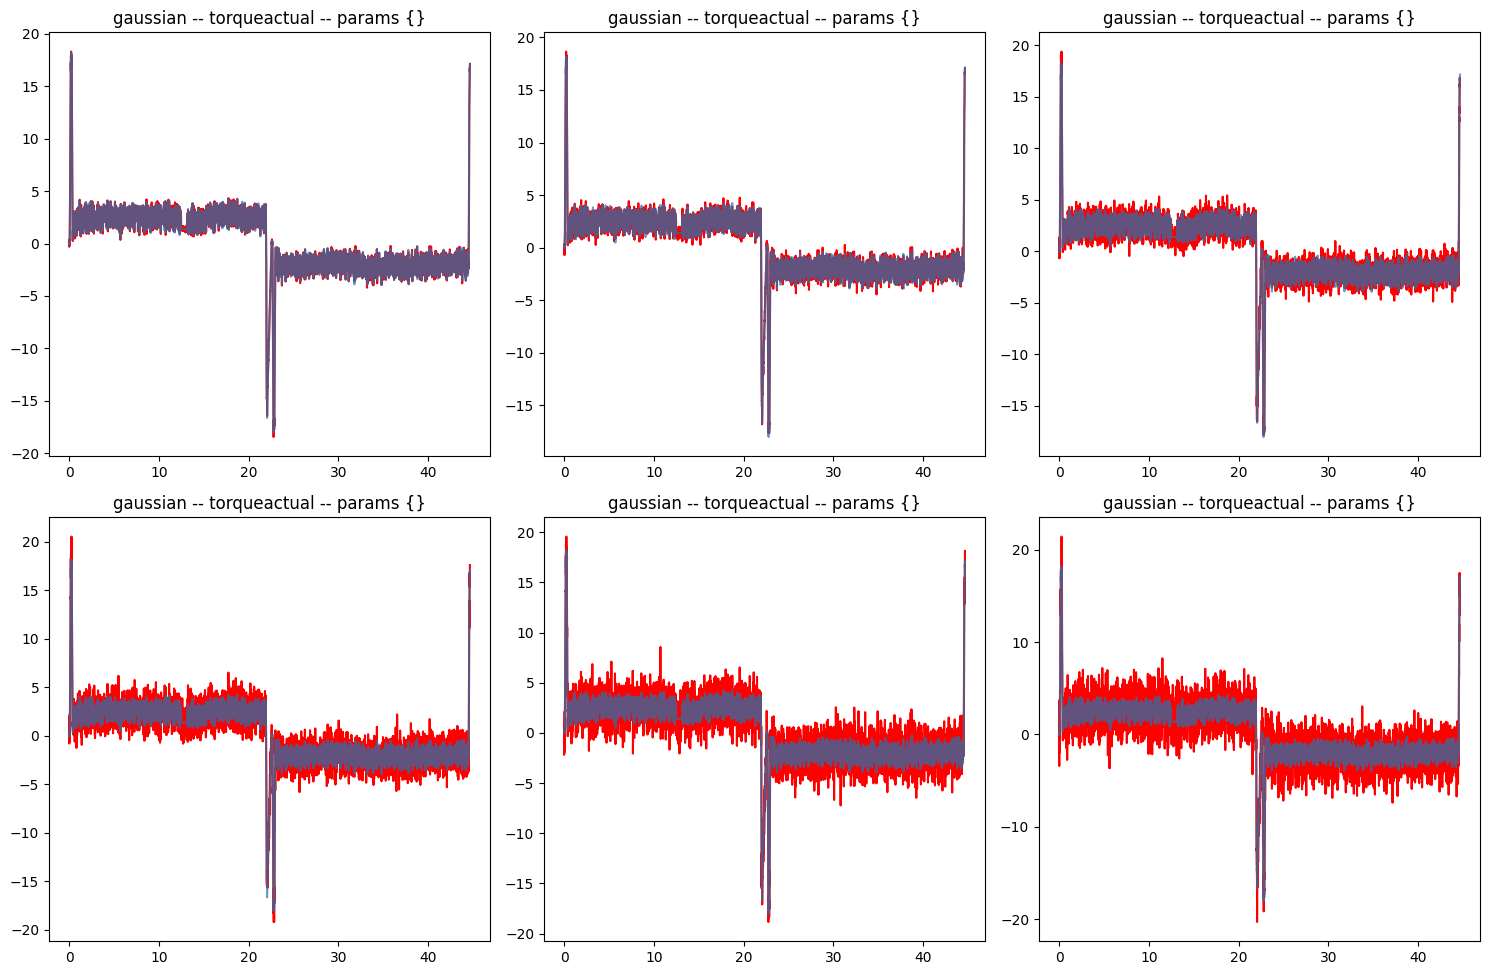

In [46]:
dfs_gaussian = {}
for x in [0.05, 0.1, 0.2,  0.3, 0.4, 0.5]:
    dfs_gaussian[f'gaussian_{x}'] = NoiseMachine.gaussian_anomaly(df_seq.copy(), x)

plot_dfs(dfs_gaussian)

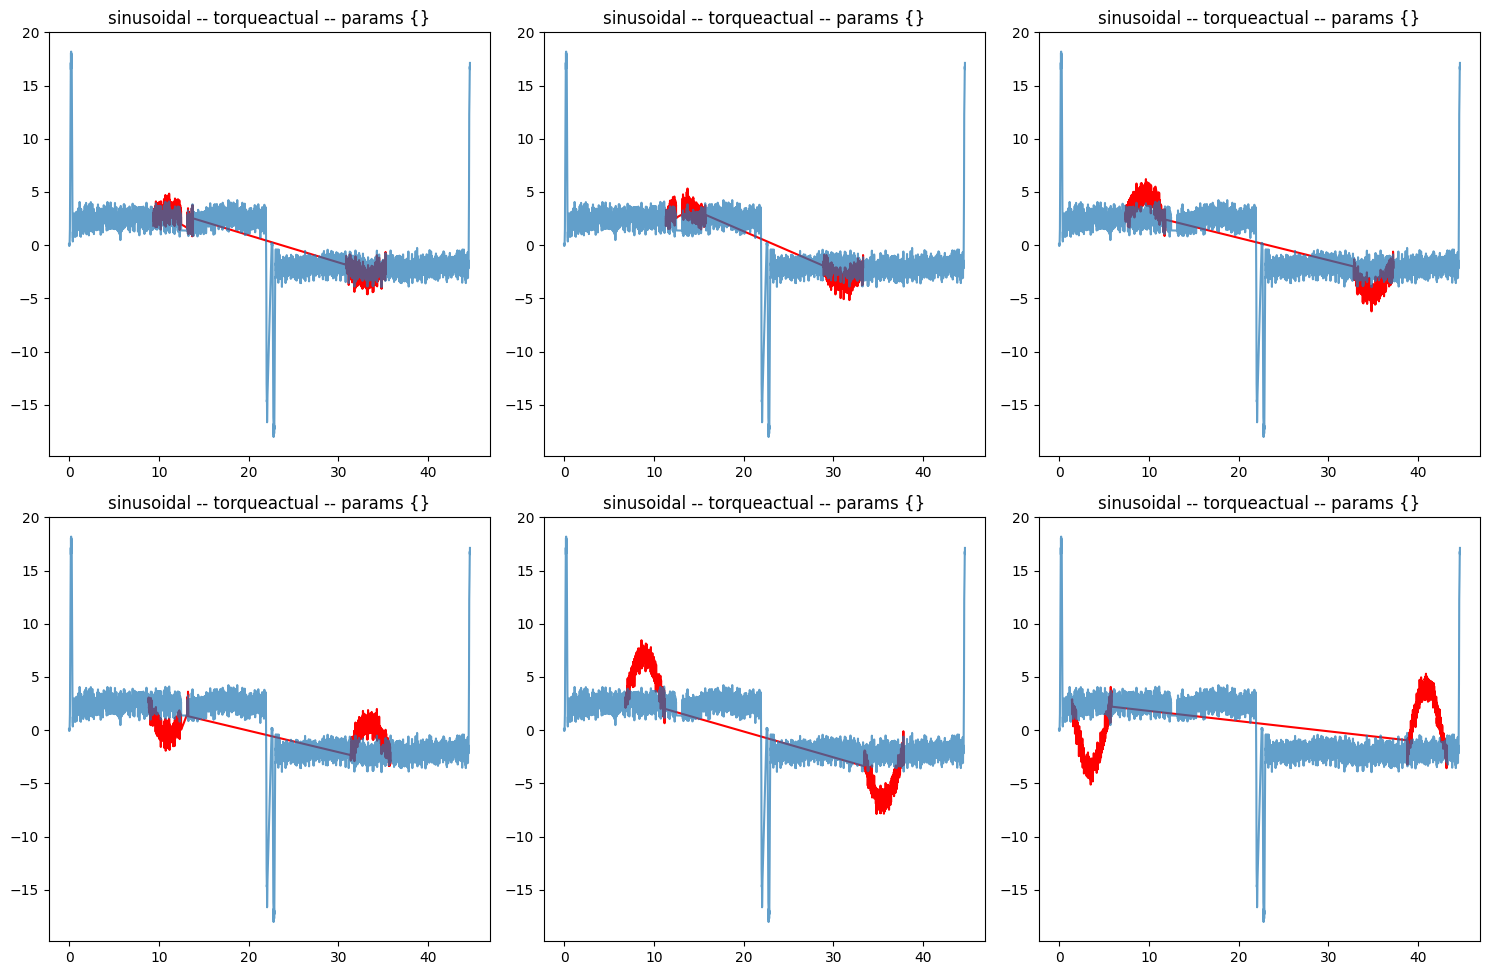

In [47]:
dfs_sinusoidal = {}
for x in [0.25, 0.5, 0.75, 1, 1.5, 2]:
    dfs_sinusoidal[f'sinusoidal_{x}'] = NoiseMachine.sinusoidal_anomaly(df_seq.copy(), 0.2, x)

plot_dfs(dfs_sinusoidal)

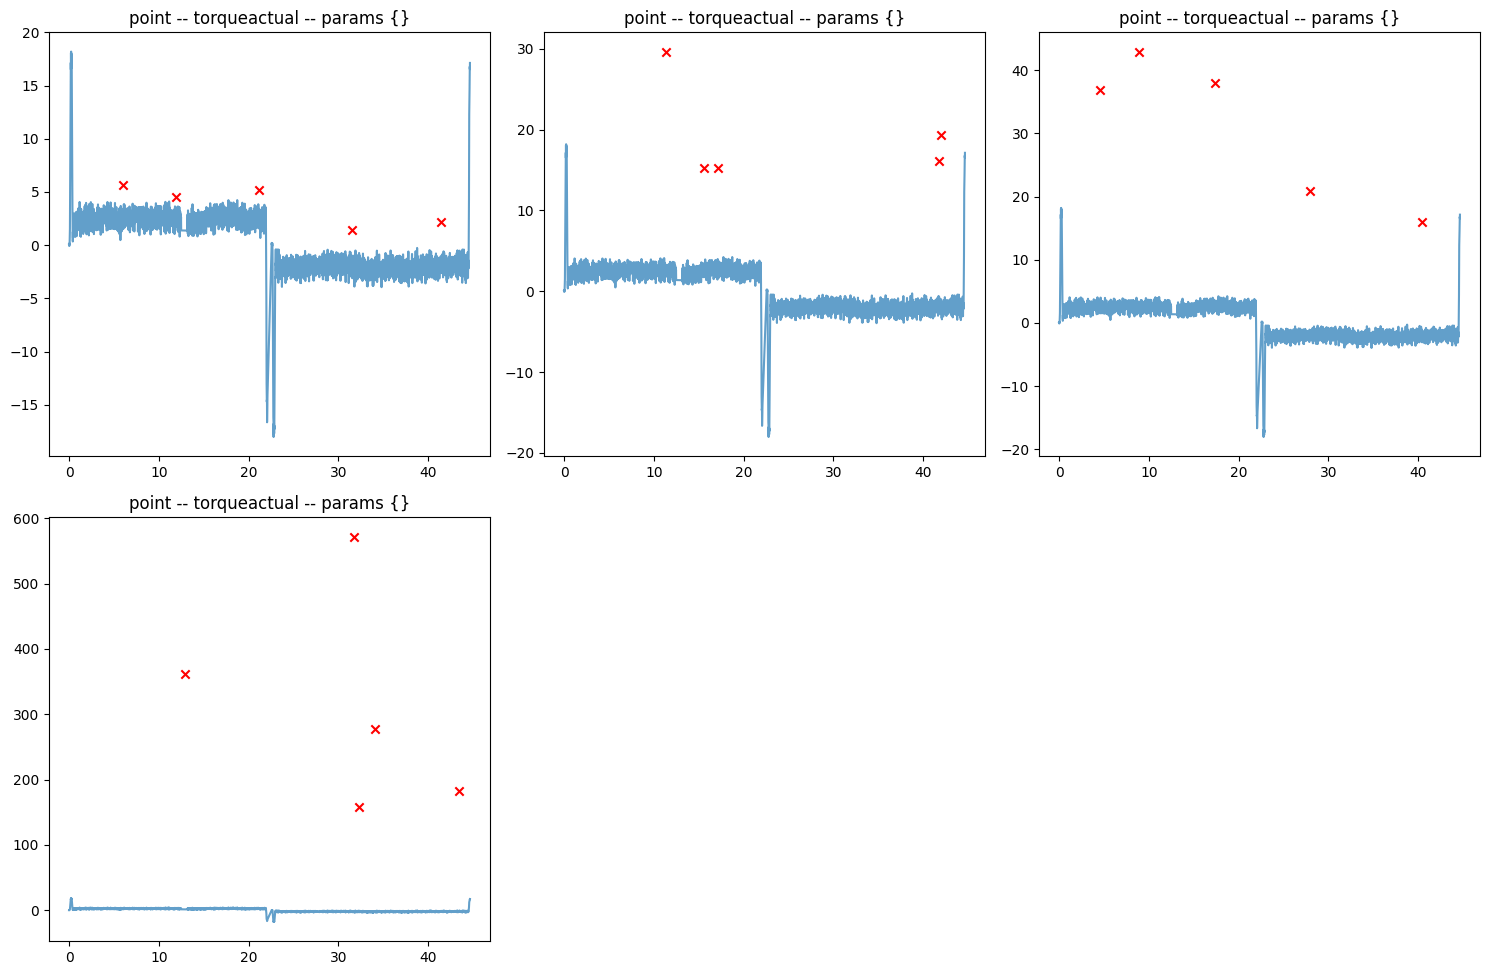

In [51]:
dfs_point = {}
for x in [1, 5, 10, 100]:
    dfs_point[f'point_{x}'] = NoiseMachine.point_anomaly(df_seq.copy(), 5, x)

plot_dfs(dfs_point)